# Movie Analysis Project by Brooke Smyth, Garrett Williams, and Scott Schumann

**Overview:** [LET'S FILL IN A ONE PARAGRAPH OVERVIEW OF THE PROJECT LATER]

**Business Problem:** [SUMMARY OF BUSINESS PROBLEM TO BE FILLED IN LATER]

**Data Understanding:** [DESCRIPTION OF DATA BEING USED IN THIS PROJECT TO BE FILLED IN LATER]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data Preparation:** [DESCRIBE AND JUSTIFY THE PROCESS OF PREPARING DATA FOR ANALYSIS TO BE FILLED IN LATER]

In [3]:
imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter="\t")
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep="\t", encoding='latin-1')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [4]:
# Merging dataframes
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#create a new column that has the year as an integer
tn['year_int'] = tn['release_date'].str[-4:].astype(int)

#get info from movies since 2010 because that's as far back as the imdb data goes
tn = tn[tn['year_int'] >= 2015]

#convert the values in the worldwide gross column to integers
tn["ww_gross_int"] = tn["worldwide_gross"].replace("[\$,]", "", regex=True).astype(int)

#convert the values in the production budget column to integers
tn["pro_budget_int"] = tn["production_budget"].replace("[\$,]", "", regex=True).astype(int)

#create a new column that calculates return on investment 
tn["roi"] = (tn["ww_gross_int"] - tn["pro_budget_int"])/tn["pro_budget_int"]

#sort the movies by return on investment
tn.sort_values(by = "roi", ascending = False, inplace = True)
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.564740
5213,14,"Apr 17, 2015",Unfriended,"$1,000,000","$32,789,645","$64,364,198",2015,64364198,1000000,63.364198
4249,50,"Jan 20, 2017",Split,"$5,000,000","$138,141,585","$278,964,806",2017,278964806,5000000,54.792961
4248,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.073590
5063,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008
...,...,...,...,...,...,...,...,...,...,...
4995,96,"Mar 20, 2015",The Walking Deceased,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4997,98,"Aug 21, 2015",The Curse of Downers Grove,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4998,99,"Dec 31, 2015",Wind Walkers,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4999,100,"Jul 8, 2016",The Dog Lover,"$2,000,000",$0,$0,2016,0,2000000,-1.000000


In [6]:
imdb_title_rb = pd.merge(imdb_title, imdb_ratings, on = "tconst", how = "left")

In [7]:
imdb_title_crb = pd.merge(imdb_title_rb, imdb_crew, on = "tconst", how = "left")
imdb_title_crb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"nm0765384,nm0749914","nm1360635,nm0749914"


In [7]:
#imdb_merged = pd.merge(imdb_title_crb, imdb_name, left_on = "directors", right_on = "nconst", how = "left")
#imdb_merged.head()

In [8]:
#Merging the TN and IMDB dataframes, which only includes data from 2010 to the present. We feel this is 
#relevant because the stakeholder is trying to start a new studio and thus more recent data is probably
#more useful.
tn_imdb_merged = pd.merge(tn, imdb_title_crb, left_on = ['movie', 'year_int'], right_on = ['primary_title', 'start_year'], how = 'inner')
tn_imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 653 non-null    int64  
 1   release_date       653 non-null    object 
 2   movie              653 non-null    object 
 3   production_budget  653 non-null    object 
 4   domestic_gross     653 non-null    object 
 5   worldwide_gross    653 non-null    object 
 6   year_int           653 non-null    int64  
 7   ww_gross_int       653 non-null    int64  
 8   pro_budget_int     653 non-null    int64  
 9   roi                653 non-null    float64
 10  tconst             653 non-null    object 
 11  primary_title      653 non-null    object 
 12  original_title     653 non-null    object 
 13  start_year         653 non-null    int64  
 14  runtime_minutes    637 non-null    float64
 15  genres             649 non-null    object 
 16  averagerating      622 non

**Data Modeling:**

In [9]:
# Just choosing the columns that will be most useful to simplify
imdb_directors_name_roi = tn_imdb_merged[['movie', 'year_int','roi','directors']]
imdb_directors_name_roi

,movie,year_int,roi,directors
0,The Gallows,2015,415.564740,"nm4000389,nm3951039"
1,Get Out,2017,50.073590,nm1443502
2,Moonlight,2016,42.497008,nm1503575
3,Dangal,2016,30.016276,nm4318159
4,Lights Out,2016,28.761302,nm2497546
...,...,...,...,...
648,The Timber,2015,-1.000000,nm2557193
649,The Walking Deceased,2015,-1.000000,nm3438843
650,The Curse of Downers Grove,2015,-1.000000,nm0553796
651,Wind Walkers,2015,-1.000000,nm0295031


In [10]:
#explode the directors column so that multiple writer can be assigned to the same movie
imdb_directors_name_roi = imdb_directors_name_roi.assign(directors=imdb_directors_name_roi['directors'].str.split(",")).explode('directors')
imdb_directors_name_roi

,movie,year_int,roi,directors
0,The Gallows,2015,415.564740,nm4000389
0,The Gallows,2015,415.564740,nm3951039
1,Get Out,2017,50.073590,nm1443502
2,Moonlight,2016,42.497008,nm1503575
3,Dangal,2016,30.016276,nm4318159
...,...,...,...,...
648,The Timber,2015,-1.000000,nm2557193
649,The Walking Deceased,2015,-1.000000,nm3438843
650,The Curse of Downers Grove,2015,-1.000000,nm0553796
651,Wind Walkers,2015,-1.000000,nm0295031


In [11]:
#now merge the name dataframe with the directors
imdb_directors_name_roi = pd.merge(imdb_directors_name_roi, imdb_name, left_on = 'directors', right_on = 'nconst', how = 'left')
imdb_directors_name_roi.head()

,movie,year_int,roi,directors,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,The Gallows,2015,415.564740,nm4000389,nm4000389,Travis Cluff,NaN,NaN,"producer,actor,director","tt8676446,tt7473716,tt2309260,tt2181752"
1,The Gallows,2015,415.564740,nm3951039,nm3951039,Chris Lofing,NaN,NaN,"producer,director,writer","tt7473716,tt2181752,tt2309260,tt8676446"
2,Get Out,2017,50.073590,nm1443502,nm1443502,Jordan Peele,1979.0,NaN,"actor,writer,producer","tt6857112,tt4139124,tt7349662,tt5052448"
3,Moonlight,2016,42.497008,nm1503575,nm1503575,Barry Jenkins,1979.0,NaN,"writer,director,producer","tt7125860,tt1133989,tt4975722,tt0385108"
4,Dangal,2016,30.016276,nm4318159,nm4318159,Nitesh Tiwari,NaN,NaN,"writer,director,music_department","tt6967980,tt1841542,tt3531852,tt5074352"


In [12]:
# get stats for roi grouped by name of director, sort by median, exclude directors who have made less than 3 movies 
stat_imdb_directors_name_roi = imdb_directors_name_roi.groupby(['primary_name'])['roi'].describe()
stat_dir_med = stat_imdb_directors_name_roi.sort_values(by=['50%'], ascending=False)
stat_dir_med = stat_dir_med[stat_dir_med['count'] >= 3]
stat_dir_med

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
David F. Sandberg,3.0,17.129901,12.891307,3.269409,11.314200,19.358991,24.060147,28.761302
Christopher Landon,3.0,10.056699,12.455483,0.036990,3.084023,6.131055,15.066553,24.002052
F. Gary Gray,3.0,3.062796,3.675571,-0.971818,1.483783,3.939385,5.080103,6.220821
Steven Spielberg,4.0,2.236355,1.221968,0.426048,2.052745,2.728456,2.912065,3.062458
Jon M. Chu,3.0,3.019500,3.745275,-0.526213,1.060922,2.648056,4.792356,6.936657
Brad Peyton,3.0,2.196383,1.181273,0.874207,1.720671,2.567136,2.857470,3.147805
Malcolm D. Lee,3.0,2.767964,1.170755,1.720210,2.136119,2.552027,3.291841,4.031655
Clint Eastwood,3.0,2.087479,1.090795,0.869873,1.643513,2.417154,2.696281,2.975409
David Yates,3.0,2.219080,1.260250,0.938345,1.599723,2.261100,2.859447,3.457794


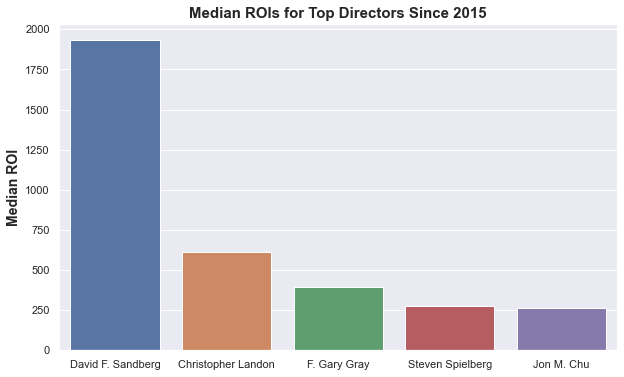

In [13]:
# Graph for Median ROIs for Top Directors Since 2015
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=stat_dir_med.index[:5], y=stat_dir_med['50%'][:5]*100)
plt.ylabel('Median ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Median ROIs for Top Directors Since 2015", fontweight= "bold", fontsize=15)
sns_plot.figure.savefig("Director_Median_ROIs.png");


In [14]:
# dfs for graphs
david = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'David F. Sandberg']
chris = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'Christopher Landon']
gary = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'F. Gary Gray']
steven = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'Steven Spielberg']
jon = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'Jon M. Chu']

In [15]:
# resetting index
david.reset_index(inplace=True)
chris.reset_index(inplace=True)
gary.reset_index(inplace=True)
steven.reset_index(inplace=True)
jon.reset_index(inplace=True)



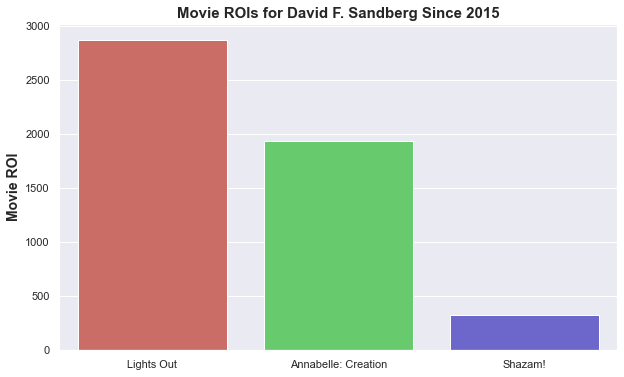

In [16]:
# Sandberg Movie ROIs
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=david['movie'], y=david['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for David F. Sandberg Since 2015", fontweight= "bold", fontsize=15);
sns_plot.figure.savefig("David_Sandberg_ROIs.png");

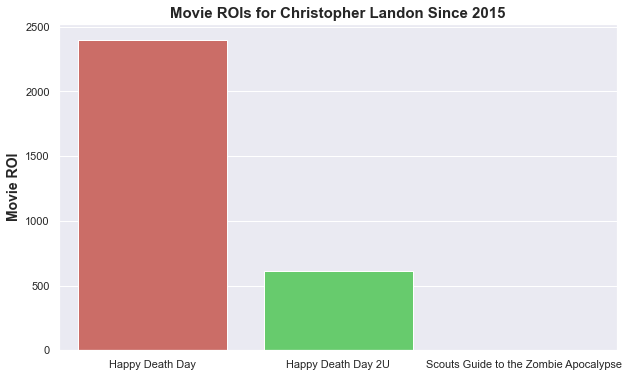

In [17]:
# Landon Movie ROIs
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=chris['movie'], y=chris['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for Christopher Landon Since 2015", fontweight= "bold", fontsize=15)
sns_plot.figure.savefig("Christopher_Landon_ROIs.png");

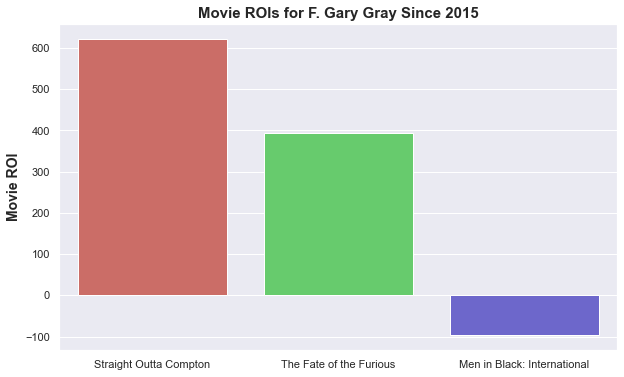

In [18]:
# Gray Movie ROIs
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=gary['movie'], y=gary['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for F. Gary Gray Since 2015",fontweight= "bold", fontsize=15)
sns_plot.figure.savefig("Gary_Gray_ROIs.png");

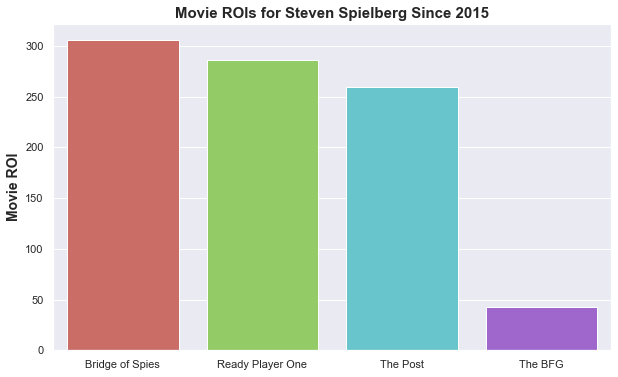

In [18]:
# Movie ROIs for Speilberg
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=steven['movie'], y=steven['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold",fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for Steven Spielberg Since 2015", fontweight= "bold", fontsize=15)
sns_plot.figure.savefig("Steven_Spielberg_ROIs.png");

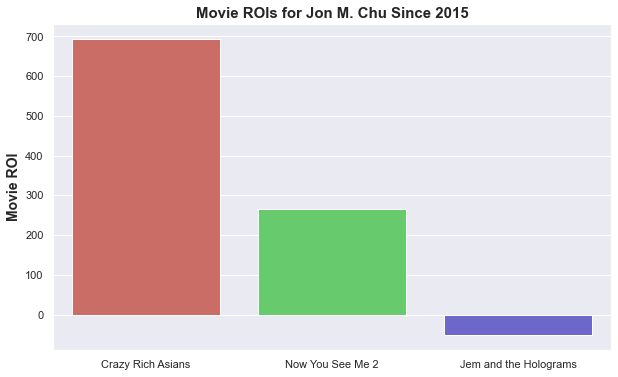

In [19]:
# Movie ROIs for Chu
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=jon['movie'], y=jon['roi']*100, palette='hls')
plt.ylabel('Movie ROI',fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for Jon M. Chu Since 2015", fontweight= "bold", fontsize=15)
sns_plot.figure.savefig("Jon_Chu_ROIs.png");